In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

Function to visualize data:

In [2]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1].item()))

Create and print the train dataset:

In [3]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Processing...
Done!
Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


Create and print the validation dataset:

In [7]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


Each picture is represented as the values in the pixel matrix shown below:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.32_image_values.png" width="550" alt="MNIST elements" />

Print example image:

The image:  None


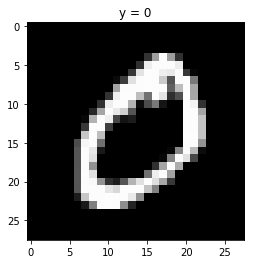

In [10]:
print("The image: ", show_data(train_dataset[1]))

We'll flatten the tensor as shown here:

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2Imagetovector2.png" width="550" alt="Flattern Image" />

<h4> Creating a Softmax Classifier </h4>

Set the input and output size:

In [15]:
input_dim = 28*28
output_dim = 10

Creating the classifier:

In [17]:
class SoftMax(nn.Module):
    def __init__(self, in_size, out_size):
        super(SoftMax, self).__init__()
        self.linear=nn.Linear(in_size, out_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [23]:
model = SoftMax(input_dim, output_dim)

In [29]:
model = nn.Sequential(nn.Linear(input_dim, output_dim))

In [31]:
print('W: ', list(model.parameters())[0].size())
print('b: ', list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


- So the actual image is 10x784 -- one parameter vector for each class

Define the learning rate, optimizer, loss criterion (cross-entropy), and data loader:

In [30]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

<h4> Train the model </h4>

In [32]:
n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

In [33]:
def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28)) #convert square images to tensor
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        correct = 0
        
        # perform a prediction on the validation data:
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28*28))
            _, yhat = torch.max(z.data, 1) #get classification column with highest value
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
        print('iteration number: ', epoch)

In [34]:
train_model(n_epochs)

<h4> Analyze Results </h4>

Plot the loss and accuracy on validation data:

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color = color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color = color)
ax1.tick_params(axis = 'y', color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Plot the first 5 misclassified samples:

In [ ]:
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break